# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
#for above can I just click twice and write my analysis???????????????

#%matplotlib notebook : This command enables interactive plots within the notebook
#%matplotlib notebook

In [2]:
# Dependencies and Setup
#In Python, both variance and standard deviation are calculated by using the NumPy module
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#merge, #why outer?????????????? if inner wont see Mouse ID????????????????????
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Display Mouse_metadata
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
# Display Study_results 
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
combined_data.info()
#same number of values in all columns with correct types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
combined_data.describe()
#description of the combined data

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [7]:
# Checking the number of mice

#why to put (), if not it counts 1809????????????????
# first tried with unique then changed nunique and found given 249 as below, why?????????????
number_of_mouse = combined_data["Mouse ID"].nunique()
number_of_mouse
#also possible with;
#number_of_mouse = combined_data["Mouse ID"].value_counts()

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mouse_id = combined_data.loc[combined_data.duplicated(subset=["Mouse ID"])].nunique() why showed dtype different???
duplicate_mouse_id = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_id
#why nunique gave solution as 1, does it mean only 1 of them duplicates which means nonunique?????????? 

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID
#filtering data to duplicate mouse

#duplicate_mouse_id = combined_data[combined_data["Mouse ID"] == "g989"] can we check this together??????????
duplicate_mouse_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mouse_df

#this is different than what is given in pymaceuticals_starter????????????????????

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#using != for 'not equal'
# clean_combined_data = combined_data[combined_data["Mouse ID"]].drop_duplicates() is this a good way of thinking?????
# can we also talk on clean_combined_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_id)==False]????????????????
clean_combined_data = combined_data[combined_data["Mouse ID"]!="g989"]
clean_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame
cleaned_number_of_mouse = len(clean_combined_data["Mouse ID"].unique())
print(f"Number of mouse after removing duplicate is: {cleaned_number_of_mouse}")
#also possible;
#cleaned_number_of_mouse = len(clean_combined_data["Mouse ID"].value_counts())

Number of mouse after removing duplicate is: 248


## Summary Statistics

In [12]:
#cleaned_number_of_mouse.describe() can we have a look with describe here??????????????
clean_combined_data = clean_combined_data.rename(columns={"Drug Regimen":"Drug"})
clean_combined_data = clean_combined_data.rename(columns={"Sex":"Gender"})
clean_combined_data = clean_combined_data.rename(columns={"Age_months":"Age (months)"})
clean_combined_data = clean_combined_data.rename(columns={"Weight(g)":"Weight (grams)"})
clean_combined_data = clean_combined_data.rename(columns={"Timepoint":"Timepoint (days)"})
clean_combined_data = clean_combined_data.rename(columns={"Tumor Volume (mm3)":"Tumor Vol (mm3)"})
clean_combined_data = clean_combined_data.drop(columns={"Metastatic Sites"})
clean_combined_data

,Mouse ID,Drug,Gender,Age (months),Weight (g),Timepoint (days),Tumor Vol (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000
1,k403,Ramicane,Male,21,16,5,38.825898
2,k403,Ramicane,Male,21,16,10,35.014271
3,k403,Ramicane,Male,21,16,15,34.223992
4,k403,Ramicane,Male,21,16,20,32.997729
...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652
1889,z969,Naftisol,Male,9,30,30,65.841013
1890,z969,Naftisol,Male,9,30,35,69.176246
1891,z969,Naftisol,Male,9,30,40,70.314904


In [13]:
#clean_combined_data_groups = clean_combined_data.groupby(["Tumor Vol (mm3)", "Drug"])
#I wanted to groupby at this step and later calculate mean, median etc, is it possible???????????
#regimen_df = merge_df.groupby("Drug")??????????????????????

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_combined_data["Tumor Vol (mm3)"].groupby(clean_combined_data["Drug"]).mean()
median = clean_combined_data["Tumor Vol (mm3)"].groupby(clean_combined_data["Drug"]).median()
variance = clean_combined_data["Tumor Vol (mm3)"].groupby(clean_combined_data["Drug"]).var()
standard_deviation = clean_combined_data["Tumor Vol (mm3)"].groupby(clean_combined_data["Drug"]).std()
sem = clean_combined_data["Tumor Vol (mm3)"].groupby(clean_combined_data["Drug"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Tumor Vol Mean (mm3)":mean, "Tumor Vol Median (mm3)":median,
                                  "Tumor Vol Variance (mm3)":variance, "Tumor Vol Std. Dev. (mm3)": standard_deviation,
                                   "Tumor Vol Std. Error (mm3)":sem}) 
summary_statistics

,Tumor Vol Mean (mm3),Tumor Vol Median (mm3),Tumor Vol Variance (mm3),Tumor Vol Std. Dev. (mm3),Tumor Vol Std. Error (mm3)
Drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
#saving to Output as csv
summary_statistics.to_csv("Output/summary_statistics.csv")

#is it also possible to save as image using like plt.savefig("Output/summary_statistics.jpg")????????

In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_statistics = clean_combined_data.groupby(["Drug"])[["Tumor Vol (mm3)"]].agg(["mean", "median", "var", 
                                                                                         "std", "sem"])

agg_summary_statistics = agg_summary_statistics.rename(columns={"mean":"Tumor Vol Mean (mm3)"})
agg_summary_statistics = agg_summary_statistics.rename(columns={"median":"Tumor Vol Median (mm3)"})
agg_summary_statistics = agg_summary_statistics.rename(columns={"var":"Tumor Vol Variance (mm3)"})
agg_summary_statistics = agg_summary_statistics.rename(columns={"std":"Tumor Vol Std. Dev. (mm3)"})
agg_summary_statistics = agg_summary_statistics.rename(columns={"sem":"Tumor Vol Std. Error (mm3)"})

agg_summary_statistics 

Tumor Vol (mm3)                         \
          Tumor Vol Mean (mm3) Tumor Vol Median (mm3)   
Drug                                                    
Capomulin            40.675741              41.557809   
Ceftamin             52.591172              51.776157   
Infubinol            52.884795              51.820584   
Ketapril             55.235638              53.698743   
Naftisol             54.331565              52.509285   
Placebo              54.033581              52.288934   
Propriva             52.320930              50.446266   
Ramicane             40.216745              40.673236   
Stelasyn             54.233149              52.431737   
Zoniferol            53.236507              51.818479   

                                                              \
          Tumor Vol Variance (mm3) Tumor Vol Std. Dev. (mm3)   
Drug                                                           
Capomulin                24.947764                  4.994774   
Ceftamin                 39.290177                  6.268188   
Infubinol                43.128684                  6.567243   
Ketapril                 68.553577                  8.279709   
Naftisol                 66.173479                  8.134708   
Placebo                  61.168083                  7.821003   
Propriva                 43.852013                  6.622085   
Ramicane                 23.486704                  4.846308   
Stelasyn                 59.450562                  7.710419   
Zoniferol                48.533355                  6.966589   

                                      
          Tumor Vol Std. Error (mm3)  
Drug                                  
Capomulin                   0.329346  
Ceftamin                    0.469821  
Infubinol                   0.492236  
Ketapril                    0.603860  
Naftisol                    0.596466  
Placebo                     0.581331  
Propriva                    0.544332  
Ramicane                    0.320955  
Stelasyn                    0.573111  
Zoniferol                   0.516398

## Bar and Pie Charts

In [17]:
#creating a group series for Drug column to later count the timepoint rows
mouse_count = clean_combined_data["Drug"].value_counts()
mouse_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug, dtype: int64

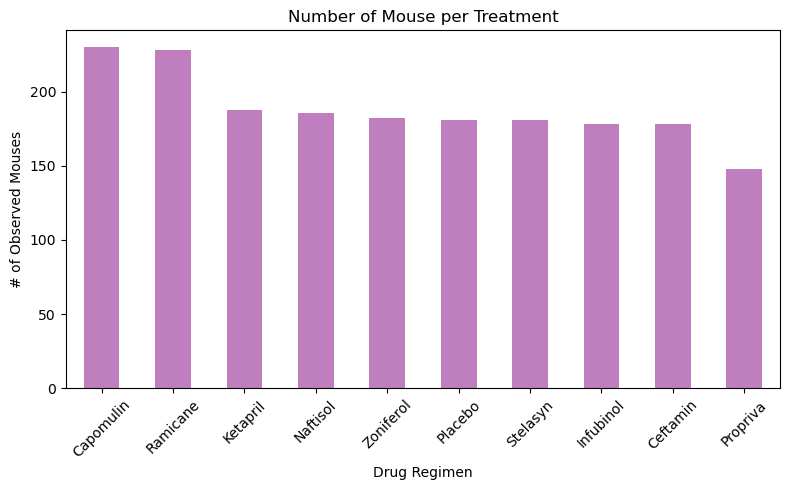

In [18]:
#does total number of rows (Mouse ID/Timepoints) in below mean counting number of mouses during the timeline?????
#is bar plot and bar chart same????????????????/

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_pandas = mouse_count.plot.bar(color="purple", alpha=0.5, figsize=(8,5))

#giving names and title to bar plot
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouses")
plt.title("Number of Mouse per Treatment")
plt.xticks(rotation=45)
plt.tight_layout()

#saving to Output folder as jpg
plt.savefig("Output/Number_of_Mouse_per_Treatment_summary_statistics_pandas.jpg")
plt.show()

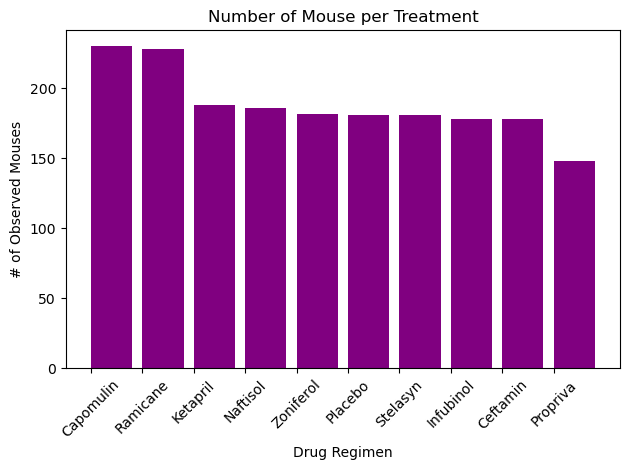

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_count.index.values #can we talk on this index???????????????
y_axis = mouse_count.values

plot_pyplot = plt.bar(x_axis, y_axis, color="purple", alpha=1, align="edge")

#giving names and title to bar plot
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouses")
plt.title("Number of Mouse per Treatment")
plt.xticks(rotation=45)
plt.tight_layout()

#saving to Output folder as jpg
plt.savefig("Output/Number_of_Mouse_per_Treatment_summary_statistics_pyplot.jpg")
plt.show()

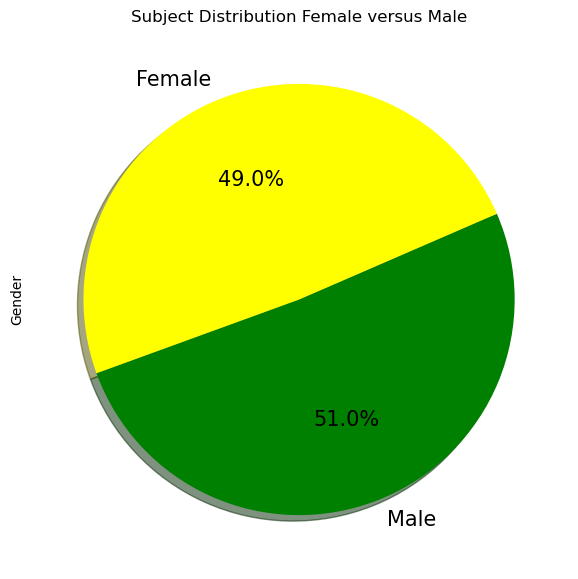

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_combined_data_gender = clean_combined_data["Gender"].value_counts()

pies  = ["Male", "Female"]
colors = ["green", "yellow"]

plt.title("Subject Distribution Female versus Male")
pie_pandas = clean_combined_data_gender.plot.pie(labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=200, 
                                                fontsize=15, figsize=(7,7))

#saving to Output folder as jpg
plt.savefig("Output/subject_distribution_gender_pie_pandas.jpg")
plt.show()

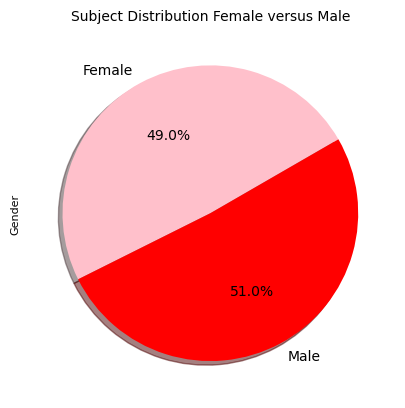

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#is this correct, can we talk on pandas and pyplot difference when doing pies????????????
#how can I have a larger pie????????????????
count = [clean_combined_data_gender["Female"], clean_combined_data_gender["Male"]]
pies  = ["Female", "Male"]
colors = ["pink", "red"]

pie_pyplot = plt.pie(count, labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=30)
plt.title("Subject Distribution Female versus Male", fontsize=10)
plt.ylabel("Gender", fontsize=8)

#saving to Output folder as jpg
plt.savefig("Output/subject_distribution_gender_pie_pyplot.jpg")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
clean_combined_data

,Mouse ID,Drug,Gender,Age (months),Weight (g),Timepoint (days),Tumor Vol (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000
1,k403,Ramicane,Male,21,16,5,38.825898
2,k403,Ramicane,Male,21,16,10,35.014271
3,k403,Ramicane,Male,21,16,15,34.223992
4,k403,Ramicane,Male,21,16,20,32.997729
...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652
1889,z969,Naftisol,Male,9,30,30,65.841013
1890,z969,Naftisol,Male,9,30,35,69.176246
1891,z969,Naftisol,Male,9,30,40,70.314904


In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#is this correct that I am using clean combined data without duplicates??????????????
Capomulin_df = clean_combined_data.loc[clean_combined_data["Drug"] == "Capomulin", :] 
Ramicane_df = clean_combined_data.loc[clean_combined_data["Drug"] == "Ramicane", :]
Infubinol_df = clean_combined_data.loc[clean_combined_data["Drug"] == "Infubinol", :]
Ceftamin_df = clean_combined_data.loc[clean_combined_data["Drug"] == "Ceftamin", :]

#checking drug regimens
Capomulin_df.head(15)
#Ramicane_df.head(25)
#Infubinol_df.head(25)
#Ceftamin_df.head(25)

,Mouse ID,Drug,Gender,Age (months),Weight (g),Timepoint (days),Tumor Vol (mm3)
10,s185,Capomulin,Female,3,17,0,45.000000
11,s185,Capomulin,Female,3,17,5,43.878496
12,s185,Capomulin,Female,3,17,10,37.614948
13,s185,Capomulin,Female,3,17,15,38.177232
14,s185,Capomulin,Female,3,17,20,36.866876
15,s185,Capomulin,Female,3,17,25,33.949940
16,s185,Capomulin,Female,3,17,30,32.959671
17,s185,Capomulin,Female,3,17,35,28.328531
18,s185,Capomulin,Female,3,17,40,25.472143
19,s185,Capomulin,Female,3,17,45,23.343598


In [24]:
# Start by getting the last (greatest) timepoint for each mouse??????????????
last_timepoint = clean_combined_data.groupby("Mouse ID").max()["Timepoint (days)"]
last_timepoint_df = pd.DataFrame(last_timepoint)
last_timepoint_df

,Timepoint (days)
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [25]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#Original dataframe, is it cleaned combined data or original data????????????????????
#do I have to do it seperately for each drug?????????????

last_tumor_volume_df = pd.merge(last_timepoint_df, clean_combined_data, on = ["Mouse ID", "Timepoint (days)"])
last_tumor_volume_df

,Mouse ID,Timepoint (days),Drug,Gender,Age (months),Weight (g),Tumor Vol (mm3)
0,a203,45,Infubinol,Female,20,23,67.973419
1,a251,45,Infubinol,Female,21,25,65.525743
2,a262,45,Placebo,Female,17,29,70.717621
3,a275,45,Ceftamin,Female,20,28,62.999356
4,a366,30,Stelasyn,Female,16,29,63.440686
...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661
244,z578,45,Ramicane,Male,11,16,30.638696
245,z581,45,Infubinol,Female,24,25,62.754451
246,z795,45,Naftisol,Female,13,29,65.741070


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []

#-1 gives from first to last event???????????
for i in range(len(last_tumor_volume_df)-1):
    if last_tumor_volume_df.loc[i, "Drug"] == "Capomulin":
        tumor_vol_cap.append(last_tumor_volume_df.loc[i, "Tumor Vol (mm3)"])
    if last_tumor_volume_df.loc[i, "Drug"] == "Ramicane":
        tumor_vol_ram.append(last_tumor_volume_df.loc[i, "Tumor Vol (mm3)"])
    if last_tumor_volume_df.loc[i, "Drug"] == "Infubinol":
        tumor_vol_inf.append(last_tumor_volume_df.loc[i, "Tumor Vol (mm3)"])
    if last_tumor_volume_df.loc[i, "Drug"] == "Ceftamin":
        tumor_vol_cef.append(last_tumor_volume_df.loc[i, "Tumor Vol (mm3)"])

tumor_vol_list = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes, add subset, 
    # Determine outliers using upper and lower bounds
outlier_list = []
for i in range(len(tumor_vol_list)):
    quartiles = pd.Series(tumor_vol_list[i]).quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatment[i]}:")
    print(f"Lower Quartile of Tumor Vol is: {lowerq}")
    print(f"Upper  Quartile of Tumor Vol is: {upperq}")
    print(f"InterQuartile of Tumor Vol is: {iqr}")
    print(f"The Median of Tumor Vol is: {quartiles[0.5]}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} could be outliers")
    print(f"Values above {upper_bound} could be outliers")
    
    #and or or?????????????????????????
    
#for j in range(len(tumor_vol_list[i])):
    #if (tumor_vol_list[i][j] < lower_bound) and (tumor_vol_list[i][j] > upper_bound):
    #outlier = tumor_vol_list[i][j]
    #outlier_list.append(outlier)
    #print(f"The Outliers are {outlier_list}")


Capomulin:
Lower Quartile of Tumor Vol is: 32.37735684
Upper  Quartile of Tumor Vol is: 40.1592203
InterQuartile of Tumor Vol is: 7.781863460000004
The Median of Tumor Vol is: 38.1251644
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers

Ramicane:
Lower Quartile of Tumor Vol is: 31.56046955
Upper  Quartile of Tumor Vol is: 40.65900627
InterQuartile of Tumor Vol is: 9.098536719999998
The Median of Tumor Vol is: 36.56165229
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers

Infubinol:
Lower Quartile of Tumor Vol is: 54.04860769
Upper  Quartile of Tumor Vol is: 65.52574285
InterQuartile of Tumor Vol is: 11.477135160000003
The Median of Tumor Vol is: 60.16518046
Values below 36.83290494999999 could be outliers
Values above 82.74144559000001 could be outliers

Ceftamin:
Lower Quartile of Tumor Vol is: 48.72207785
Upper  Quartile of Tumor Vol is: 64.29983003
InterQuartile of Tumor Vol is: 15.577752179999997

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
